In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install lazypredict

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/kaggle/input/bug-hunter/BugHunterDataset-1.0/single/orientdb/class.csv")

In [6]:
df.sample(5)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
3642,a56ae91e7d9f772da4288542cee900793c24e5e1,com.orientechnologies.orient.core.sql.OCommand...,0.75,5,18,5,0.53,0.54,38,28,...,0,0,0,0,0,0,0,0,0,0
3097,46bbcabde62c2b9e61ebaf45dc23f16d9dee7f02,com.orientechnologies.orient.server.OConnectio...,0.31,7,45,13,0.24,0.24,281,223,...,0,0,0,0,5,0,2,4,0,1
1038,e43642ac7d51dbda02d91a16b7024d9f80c6d272,com.orientechnologies.orient.server.network.Bi...,0.00,0,0,0,0.00,0.00,0,0,...,0,0,0,0,0,0,1,0,0,0
1302,e9e6148e7b6fe758168c042bbada8c352cb08759,com.orientechnologies.orient.core.sql.OCommand...,0.00,0,0,0,0.00,0.00,0,0,...,0,0,3,0,0,1,0,0,0,1
1595,87154d21d3773b56833010727fdc7e1c88c9aee3,com.orientechnologies.orient.core.index.OIndex...,0.00,0,0,0,0.00,0.00,0,0,...,0,3,0,0,0,0,2,0,0,1


In [7]:
df.shape

(3802, 98)

In [8]:
pd.set_option('display.max_rows',100)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CC,3802.00,0.15,0.23,0.00,0.00,0.05,0.21,1.00
CCL,3802.00,4.19,10.71,0.00,0.00,1.00,4.00,215.00
CCO,3802.00,49.10,549.57,0.00,0.00,3.00,19.00,20998.00
CI,3802.00,10.07,50.56,0.00,0.00,1.00,6.00,1630.00
CLC,3802.00,0.13,0.20,0.00,0.00,0.04,0.18,1.00
CLLC,3802.00,0.14,0.21,0.00,0.00,0.05,0.20,1.00
LDC,3802.00,98.05,344.53,0.00,0.00,13.00,78.75,5777.00
LLDC,3802.00,83.59,329.30,0.00,0.00,12.00,62.00,5730.00
LCOM5,3802.00,3.26,6.33,0.00,1.00,2.00,3.00,101.00
NL,3802.00,4.06,3.69,0.00,1.00,3.00,6.00,27.00


In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               3802 non-null   object 
 1   LongName                           3802 non-null   object 
 2   CC                                 3802 non-null   float64
 3   CCL                                3802 non-null   int64  
 4   CCO                                3802 non-null   int64  
 5   CI                                 3802 non-null   int64  
 6   CLC                                3802 non-null   float64
 7   CLLC                               3802 non-null   float64
 8   LDC                                3802 non-null   int64  
 9   LLDC                               3802 non-null   int64  
 10  LCOM5                              3802 non-null   int64  
 11  NL                                 3802 non-null   int64

#### All values except Hash and LongName are numeric and I will drop them. There is no need for encoding.

In [10]:
cat_cols = ["Hash","LongName"]
df.drop(cat_cols, axis = 1, inplace = True)

In [11]:
df.columns

Index(['CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'LDC', 'LLDC', 'LCOM5', 'NL',
       'NLE', 'WMC', 'CBO', 'CBOI', 'NII', 'NOI', 'RFC', 'AD', 'CD', 'CLOC',
       'DLOC', 'PDA', 'PUA', 'TCD', 'TCLOC', 'DIT', 'NOA', 'NOC', 'NOD', 'NOP',
       'LLOC', 'LOC', 'NA', 'NG', 'NLA', 'NLG', 'NLM', 'NLPA', 'NLPM', 'NLS',
       'NM', 'NOS', 'NPA', 'NPM', 'NS', 'TLLOC', 'TLOC', 'TNA', 'TNG', 'TNLA',
       'TNLG', 'TNLM', 'TNLPA', 'TNLPM', 'TNLS', 'TNM', 'TNOS', 'TNPA', 'TNPM',
       'TNS', 'WarningBlocker', 'WarningCritical', 'WarningInfo',
       'WarningMajor', 'WarningMinor', 'Android Rules', 'Basic Rules',
       'Brace Rules', 'Clone Implementation Rules', 'Code Size Rules',
       'Comment Rules', 'Controversial Rules', 'Coupling Rules',
       'Design Rules', 'Empty Code Rules', 'Finalizer Rules',
       'Import Statement Rules', 'J2EE Rules', 'JUnit Rules',
       'Jakarta Commons Logging Rules', 'Java Logging Rules', 'JavaBean Rules',
       'MigratingToJUnit4 Rules', 'Migration Rules'

In [12]:
len(df.columns)

96

In [13]:
description_of_metrics = {
    'Hash': "Dosyanın benzersiz bir tanımlayıcısı.",
    'LongName': "Dosyanın uzun adı.",
    'CC': "Karmaşıklık Skoru (Cyclomatic Complexity Score).",
    'CCL': "Karmaşıklık Skoru Limiti (Cyclomatic Complexity Limit).",
    'CCO': "Karmaşıklık Skoru Aşım Oranı (Cyclomatic Complexity Overflow).",
    'CI': "Kalite İndeksi.",
    'CLC': "Kod Kalitesi Limiti.",
    'CLLC': "Kod Kalitesi Limiti Aşım Oranı.",
    'LDC': "Lokal Değişken Sayısı (Local Variable Count).",
    'LLDC': "Lokal Uzunluk Değişken Sayısı (Local Long Variable Count).",
    'LCOM5': "LCOM5 (Lack of Cohesion in Methods) Metrik Değeri.",
    'NL': "Nesne Sayısı.",
    'NLE': "Nesne Limiti.",
    'WMC': "Ağırlıklı Metot Sayısı (Weighted Method Count).",
    'CBO': "Bağlılık Sayısı (Coupling Between Objects).",
    'CBOI': "Bağlılık Sayısı Limiti (Coupling Between Objects Limit).",
    'NII': "Nesne İçerme İndeksi (Number of Inherited Methods).",
    'NOI': "Nesne İçerme Limiti (Number of Inherited Limit).",
    'RFC': "Fonksiyon Çağrısı Sayısı (Response For a Class).",
    'AD': "Asgari Mesafe.",
    'CD': "Çocuk Sayısı (Child Count).",
    'CLOC': "Yürütülen Kod Satırı Sayısı (Count of Lines of Code).",
    'DLOC': "Silinen Kod Satırı Sayısı (Deleted Lines of Code).",
    'PDA': "Genel Çeşitlilik.",
    'PUA': "Kullanılmayan Parametre Sayısı (Unused Parameters Count).",
    'TCD': "Çalışma Süresi Bağlılığı (Temporal Coupling Degree).",
    'TCLOC': "Toplam Yürütülen Kod Satırı Sayısı (Total Count of Lines of Code).",
    'DIT': "Derinlik İkilik Ağacı (Depth of Inheritance Tree).",
    'NOA': "İlgili Nesne Sayısı (Number of Aggregated Objects).",
    'NOC': "İlgili Çocuk Nesne Sayısı (Number of Children).",
    'NOD': "Çıkış Nesnesi Sayısı (Number of Descendants).",
    'NOP': "Çıkış Parametre Sayısı (Number of Parameters).",
    'LLOC': "Lokal Kod Satırı Sayısı (Local Lines of Code).",
    'LOC': "Toplam Kod Satırı Sayısı (Lines of Code).",
    'NA': "İlgili Metot Sayısı (Number of Attributes).",
    'NG': "Metot Grup Sayısı (Number of Groups).",
    'NLA': "Uygulanan Lokal Arayüz Sayısı (Number of Local Accessors).",
    'NLG': "Uygulanan Lokal Getter Sayısı (Number of Local Getters).",
    'NLM': "Uygulanan Lokal Metot Sayısı (Number of Local Methods).",
    'NLPA': "Uygulanan Lokal Parametre Sayısı (Number of Local Parameters).",
    'NLPM': "Uygulanan Lokal Parametre Metot Sayısı (Number of Local Parameter Methods).",
    'NLS': "Uygulanan Lokal Setter Sayısı (Number of Local Setters).",
    'NM': "Uygulanan Metot Sayısı (Number of Methods).",
    'NOS': "Çıkış Üzerindeki Nesne Sayısı (Number of Objects).",
    'NPA': "Uygulanan Parametre Sayısı (Number of Parameters).",
    'NPM': "Uygulanan Parametre Metot Sayısı (Number of Parameter Methods).",
    'NS': "Uygulanan Setter Sayısı (Number of Setters).",
    'TLLOC': "Toplam Lokal Kod Satırı Sayısı (Total Lines of Local Code).",
    'TLOC': "Toplam Kod Satırı Sayısı (Total Lines of Code).",
    'TNA': "Toplam Nesne Sayısı (Total Number of Objects).",
    'TNG': "Toplam Metot Grup Sayısı (Total Number of Groups).",
    'TNLA': "Toplam Uygulanan Lokal Arayüz Sayısı (Total Number of Local Accessors).",
    'TNLG': "Toplam Uygulanan Lokal Getter Sayısı (Total Number of Local Getters).",
    'TNLM': "Toplam Uygulanan Lokal Metot Sayısı (Total Number of Local Methods).",
    'TNLPA': "Toplam Uygulanan Lokal Parametre Sayısı (Total Number of Local Parameters).",
    'TNLPM': "Toplam Uygulanan Lokal Parametre Metot Sayısı (Total Number of Local Parameter Methods).",
    'TNLS': "Toplam Uygulanan Lokal Setter Sayısı (Total Number of Local Setters).",
    'TNM': "Toplam Uygulanan Metot Sayısı (Total Number of Methods).",
    'TNOS': "Toplam Çıkış Üzerindeki Nesne Sayısı (Total Number of Objects).",
    'TNPA': "Toplam Uygulanan Parametre Sayısı (Total Number of Parameters).",
    'TNPM': "Toplam Uygulanan Parametre Metot Sayısı (Total Number of Parameter Methods).",
    'TNS': "Toplam Uygulanan Setter Sayısı (Total Number of Setters).",
    'WarningBlocker': "Bloke Edici Uyarı Sayısı.",
    'WarningCritical': "Kritik Uyarı Sayısı.",
    'WarningInfo': "Bilgi Uyarısı Sayısı.",
    'WarningMajor': "Önemli Uyarı Sayısı.",
    'WarningMinor': "Küçük Uyarı Sayısı.",
    'Android Rules': "Android uygulama geliştirme ile ilgili kurallar.",
    'Basic Rules': "Temel kod yazma kuralları.",
    'Brace Rules': "Süslü parantez kullanım kuralları.",
    'Clone Implementation Rules': "Klonlanmış kodların uygulama kuralları.",
    'Code Size Rules': "Kod boyutu ile ilgili kurallar.",
    'Comment Rules': "Yorum satırları ile ilgili kurallar.",
    'Controversial Rules': "Tartışmalı kod yazma kuralları.",
    'Coupling Rules': "Modül bağlantıları ile ilgili kurallar.",
    'Design Rules': "Yazılım tasarımı ile ilgili kurallar.",
    'Empty Code Rules': "Boş kod blokları ile ilgili kurallar.",
    'Finalizer Rules': "Finalizer metotları ile ilgili kurallar.",
    'Import Statement Rules': "İmport ifadeleri ile ilgili kurallar.",
    'J2EE Rules': "Java 2 Enterprise Edition ile ilgili kurallar.",
    'JUnit Rules': "JUnit test kapsamı ile ilgili kurallar.",
    'Jakarta Commons Logging Rules': "Jakarta Commons Logging kütüphanesi ile ilgili kurallar.",
    'Java Logging Rules': "Java loglama ile ilgili kurallar.",
    'JavaBean Rules': "JavaBean uygulama kuralları.",
    'MigratingToJUnit4 Rules': "JUnit 4'e geçiş kuralları.",
    'Migration Rules': "Geçiş kuralları.",
    'Migration13 Rules': "Geçiş versiyon 1.3 kuralları.",
    'Migration14 Rules': "Geçiş versiyon 1.4 kuralları.",
    'Migration15 Rules': "Geçiş versiyon 1.5 kuralları.",
    'Naming Rules': "İsimlendirme kuralları.",
    'Optimization Rules': "Kod optimizasyonu ile ilgili kurallar.",
    'Security Code Guideline Rules': "Güvenlik kodu rehberi kuralları.",
    'Strict Exception Rules': "Katı istisna kuralları.",
    'String and StringBuffer Rules': "String ve StringBuffer kullanım kuralları.",
    'Type Resolution Rules': "Tür çözümleme kuralları.",
    'Unnecessary and Unused Code Rules': "Gereksiz ve kullanılmayan kod kuralları.",
    'Vulnerability Rules': "Güvenlik açığı ile ilgili kurallar.",
    'Number of Bugs': "Hata Sayısı."
}

In [14]:
description_of_metrics["NPM"]

'Uygulanan Parametre Metot Sayısı (Number of Parameter Methods).'

In [15]:
 df.isna().sum().sum()

0

There are no null values in the dataset

In [16]:
df["Number of Bugs"].value_counts()

Number of Bugs
0    2138
1    1332
2     242
3      65
4      15
5       8
6       2
Name: count, dtype: int64

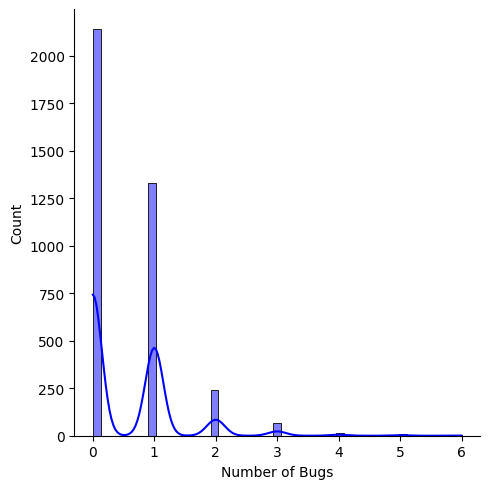

In [17]:
sns.displot(df['Number of Bugs'], kde = True, color = "blue")
plt.show()

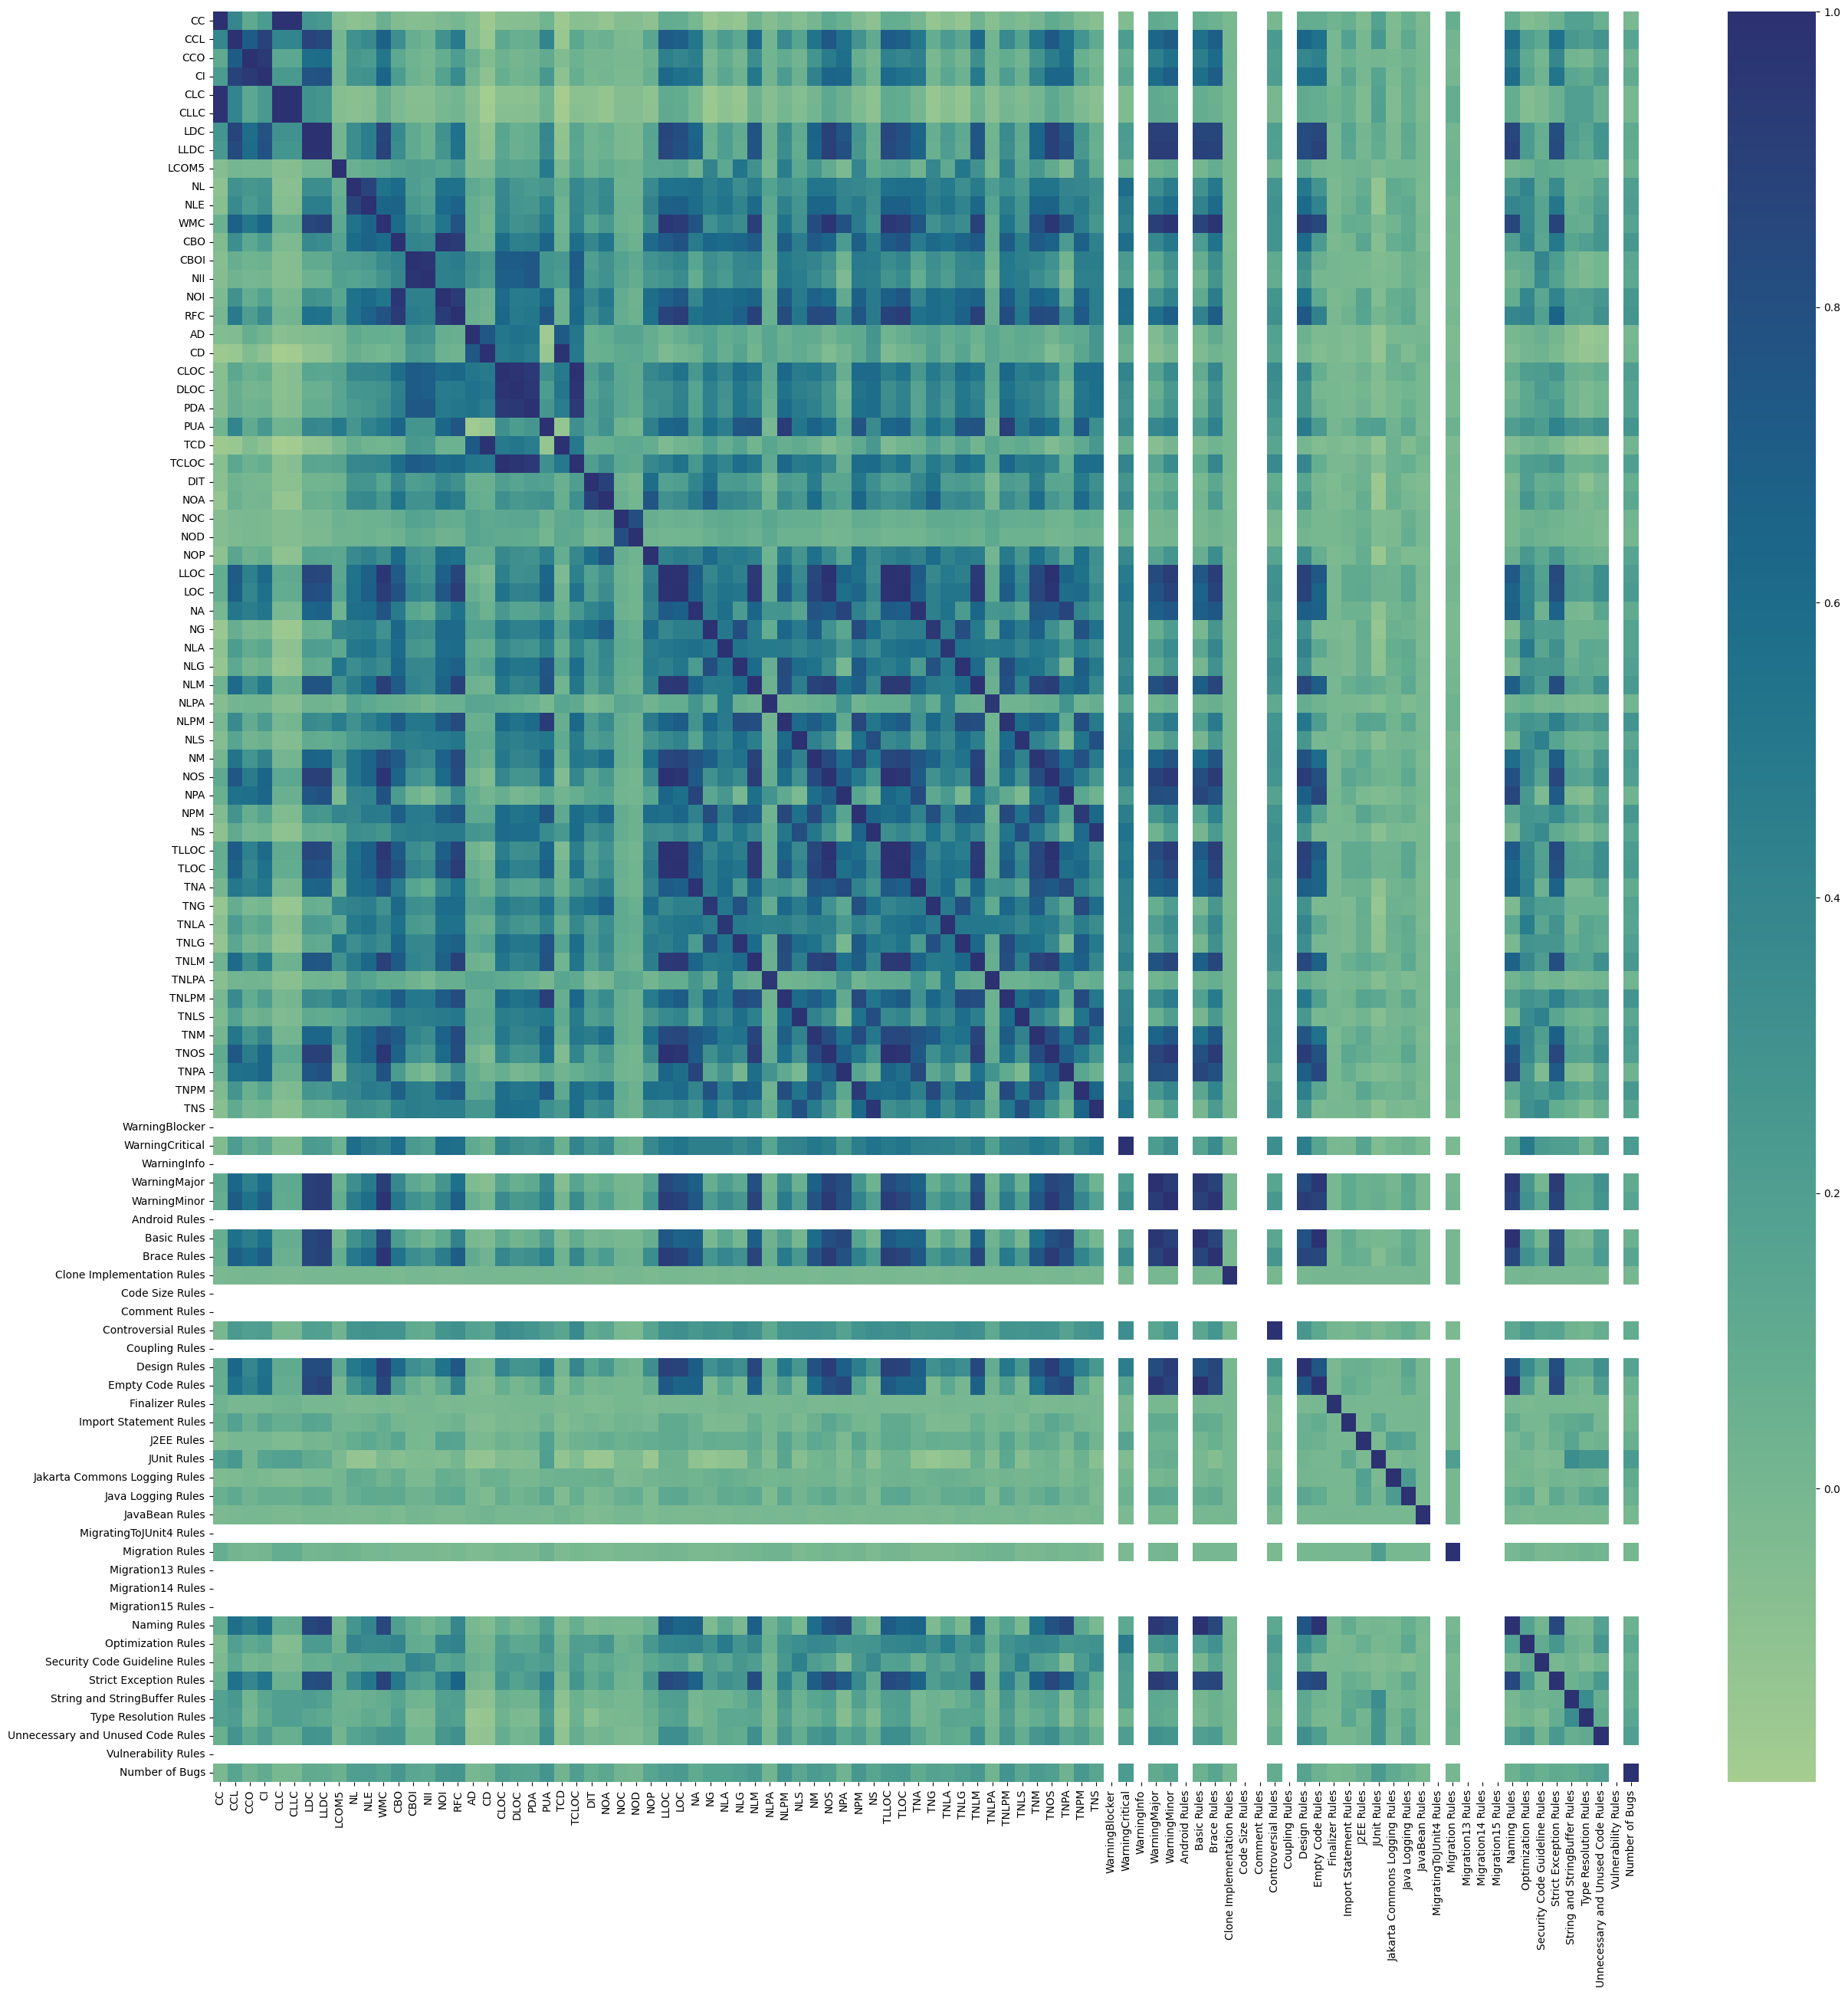

In [18]:
corr = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap='crest', annot=False)
plt.show()

#### I will examine the columns that do not return values in the correlation matrix.

In [19]:
col_without_values = ["WarningBlocker","WarningInfo","Code Size Rules","Comment Rules","Coupling Rules",
                      "MigratingToJUnit4 Rules","Migration14 Rules","Migration13 Rules","Migration15 Rules",
                      "Vulnerability Rules","Android Rules"]

In [20]:
for col in col_without_values:
  print(f"Unique values for {col} : {df[col].unique()}")

Unique values for WarningBlocker : [0]
Unique values for WarningInfo : [0]
Unique values for Code Size Rules : [0]
Unique values for Comment Rules : [0]
Unique values for Coupling Rules : [0]
Unique values for MigratingToJUnit4 Rules : [0]
Unique values for Migration14 Rules : [0]
Unique values for Migration13 Rules : [0]
Unique values for Migration15 Rules : [0]
Unique values for Vulnerability Rules : [0]
Unique values for Android Rules : [0]


#### I am dropping these columns (col_without_values) because they consist solely of zeros.

In [21]:
df.drop(col_without_values, axis = 1, inplace = True)

In [22]:
df.shape
# I have removed 13 columns from the dataset (11 numeric + 2 categorical)

(3802, 85)

In [23]:
print("Skewness: %f" % df['Number of Bugs'].skew())
print("Kurtosis: %f" % df['Number of Bugs'].kurt())

Skewness: 1.808008
Kurtosis: 5.237128


In [24]:
for col in df.columns:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

CC              Skewness: 01.82     Kurtosis: 002.78
CCL             Skewness: 08.34     Kurtosis: 112.92
CCO             Skewness: 30.90     Kurtosis: 1120.89
CI              Skewness: 20.92     Kurtosis: 587.32
CLC             Skewness: 01.98     Kurtosis: 003.79
CLLC            Skewness: 01.90     Kurtosis: 003.37
LDC             Skewness: 12.17     Kurtosis: 183.56
LLDC            Skewness: 13.53     Kurtosis: 215.37
LCOM5           Skewness: 09.80     Kurtosis: 131.98
NL              Skewness: 01.80     Kurtosis: 005.18
NLE             Skewness: 01.56     Kurtosis: 008.67
WMC             Skewness: 11.50     Kurtosis: 172.97
CBO             Skewness: 02.34     Kurtosis: 005.85
CBOI            Skewness: 06.71     Kurtosis: 050.41
NII             Skewness: 06.69     Kurtosis: 045.61
NOI             Skewness: 02.51     Kurtosis: 006.47
RFC             Skewness: 02.86     Kurtosis: 010.58
AD              Skewness: 02.00     Kurtosis: 004.29
CD              Skewness: 02.08     Kurtosis:

In [25]:
corr = df.corr()
target_correlations = corr['Number of Bugs']
print("Correlation of features with Number of Bugs:\n",target_correlations)

Correlation of features with Number of Bugs:
 CC                                  -0.01
CCL                                  0.15
CCO                                  0.03
CI                                   0.10
CLC                                 -0.01
CLLC                                -0.00
LDC                                  0.11
LLDC                                 0.10
LCOM5                                0.05
NL                                   0.20
NLE                                  0.21
WMC                                  0.17
CBO                                  0.26
CBOI                                 0.13
NII                                  0.13
NOI                                  0.26
RFC                                  0.28
AD                                  -0.00
CD                                   0.02
CLOC                                 0.20
DLOC                                 0.16
PDA                                  0.16
PUA                           

In [26]:
low_corr = []
for i in range(len(target_correlations)):
    if target_correlations[i]<abs(.1):
        low_corr.append(target_correlations.index[i])

In [27]:
len(low_corr)

30

In [28]:
for i in low_corr:
    print(description_of_metrics[i])

Karmaşıklık Skoru (Cyclomatic Complexity Score).
Karmaşıklık Skoru Aşım Oranı (Cyclomatic Complexity Overflow).
Kalite İndeksi.
Kod Kalitesi Limiti.
Kod Kalitesi Limiti Aşım Oranı.
Lokal Uzunluk Değişken Sayısı (Local Long Variable Count).
LCOM5 (Lack of Cohesion in Methods) Metrik Değeri.
Asgari Mesafe.
Çocuk Sayısı (Child Count).
Çalışma Süresi Bağlılığı (Temporal Coupling Degree).
Derinlik İkilik Ağacı (Depth of Inheritance Tree).
İlgili Çocuk Nesne Sayısı (Number of Children).
Çıkış Nesnesi Sayısı (Number of Descendants).
Uygulanan Lokal Parametre Sayısı (Number of Local Parameters).
Uygulanan Parametre Sayısı (Number of Parameters).
Toplam Uygulanan Lokal Parametre Sayısı (Total Number of Local Parameters).
Toplam Uygulanan Parametre Sayısı (Total Number of Parameters).
Temel kod yazma kuralları.
Klonlanmış kodların uygulama kuralları.
Tartışmalı kod yazma kuralları.
Boş kod blokları ile ilgili kurallar.
Finalizer metotları ile ilgili kurallar.
İmport ifadeleri ile ilgili kurallar

In [29]:
feature_groups = df.groupby('Number of Bugs').mean()
#I will examine the average values of all features according to the number of bugs

In [30]:
feature_groups.T

Number of Bugs,0,1,2,3,4,5,6
CC,0.16,0.15,0.13,0.15,0.24,0.38,0.24
CCL,3.32,4.41,7.23,11.86,15.20,23.75,14.00
CCO,36.90,58.03,81.67,132.48,94.07,75.12,43.50
CI,7.42,10.82,18.50,34.38,44.27,66.88,38.50
CLC,0.14,0.13,0.11,0.14,0.21,0.34,0.20
CLLC,0.15,0.13,0.12,0.15,0.23,0.36,0.22
LDC,74.84,107.37,192.17,277.97,193.67,253.00,133.50
LLDC,63.47,91.25,166.55,244.37,161.93,216.50,113.50
LCOM5,2.90,3.65,4.29,3.72,1.87,1.00,1.00
NL,3.46,4.47,6.26,7.03,5.13,1.75,2.00


#### It seems that the lower the metric value, the fewer the number of bugs.

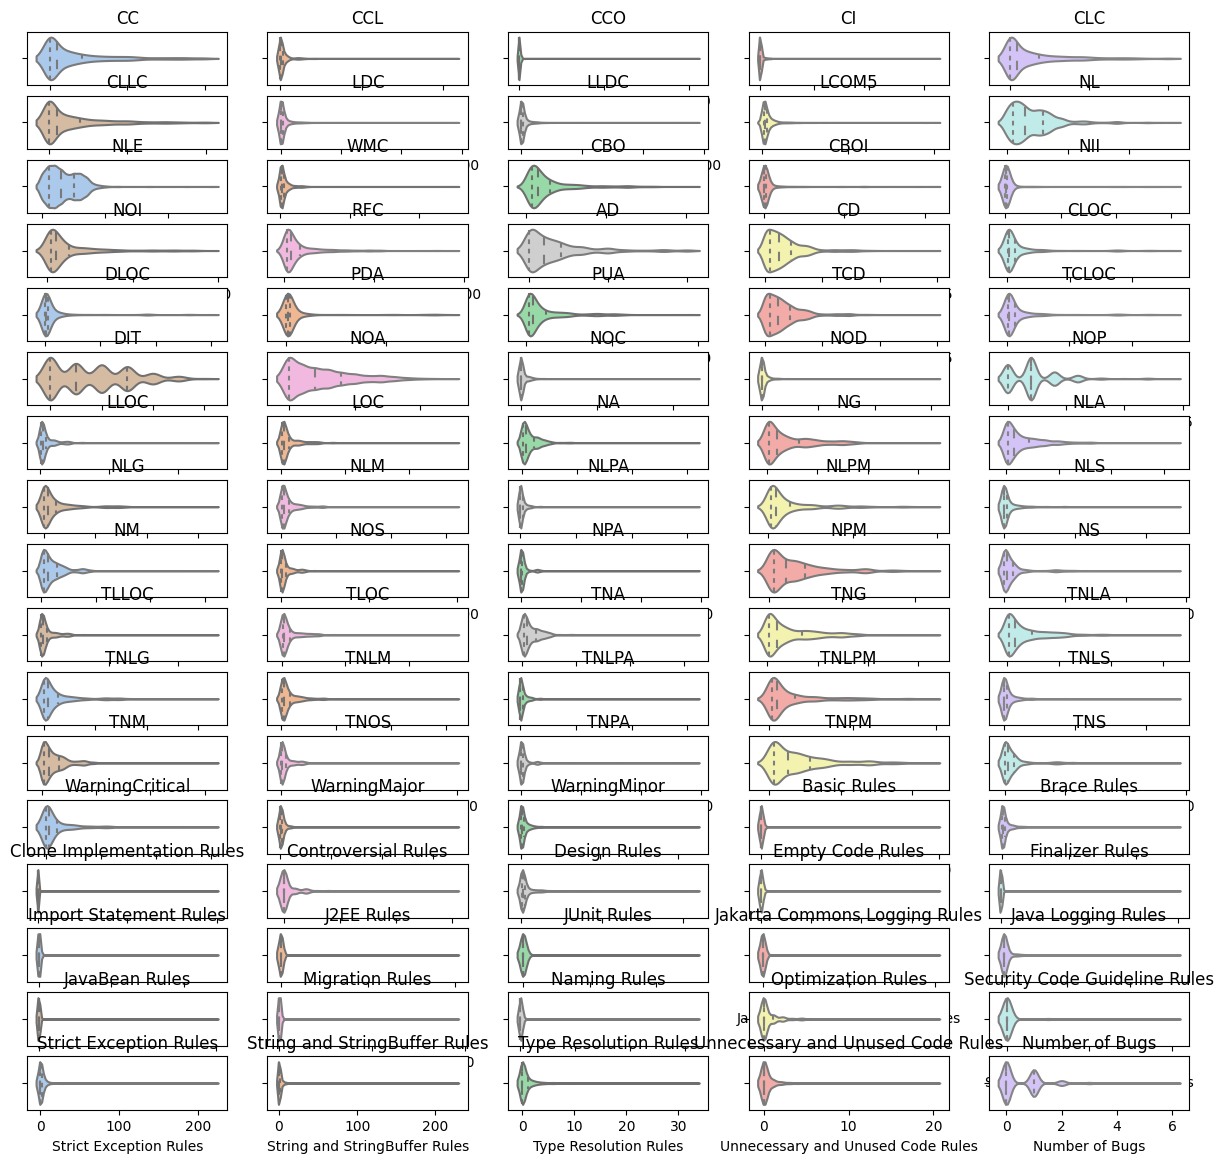

In [31]:
fig, axes = plt.subplots(nrows=17, ncols=5, figsize=(15, 14))
axes = axes.flatten()

custom_colors = sns.color_palette("pastel", len(df.columns))

for i, (col, color) in enumerate(zip(df.columns, custom_colors)):
    sns.violinplot(x=df[col], ax=axes[i], inner="quartile", color=color)
    axes[i].set_title(f'{col}')

plt.show()

In [32]:
X=df.drop(columns=['Number of Bugs'])
y=df['Number of Bugs']

In [33]:
print(f"Shape of X : {X.shape}, Shape of y : {y.shape}")

Shape of X : (3802, 84), Shape of y : (3802,)


In [34]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state= 42)

In [36]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),
                 max_iter=300,
                 random_state=42)
mlp.fit(X_train, y_train)

y_pred=mlp.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy obtained using all features with MLP : {accuracy:.4f}')

Accuracy obtained using all features with MLP : 0.4336


In [37]:
logreg = LogisticRegression(max_iter = 500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy obtained using all features with Logistic Regression: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy obtained using all features with Logistic Regression: 0.5598


In [38]:
pca=PCA()
X=pca.fit_transform(X)
ratio=pca.explained_variance_ratio_

In [39]:
# Cumulative variance
cum_var_rat=np.cumsum(ratio)
for i, ratio in enumerate(cum_var_rat,1):
    print(f'Compenent {i}: {ratio:.4f}')

Compenent 1: 0.3817
Compenent 2: 0.5192
Compenent 3: 0.6095
Compenent 4: 0.6864
Compenent 5: 0.7425
Compenent 6: 0.7741
Compenent 7: 0.8016
Compenent 8: 0.8259
Compenent 9: 0.8437
Compenent 10: 0.8577
Compenent 11: 0.8710
Compenent 12: 0.8818
Compenent 13: 0.8921
Compenent 14: 0.9018
Compenent 15: 0.9104
Compenent 16: 0.9181
Compenent 17: 0.9257
Compenent 18: 0.9330
Compenent 19: 0.9397
Compenent 20: 0.9459
Compenent 21: 0.9512
Compenent 22: 0.9562
Compenent 23: 0.9609
Compenent 24: 0.9654
Compenent 25: 0.9691
Compenent 26: 0.9723
Compenent 27: 0.9750
Compenent 28: 0.9773
Compenent 29: 0.9794
Compenent 30: 0.9813
Compenent 31: 0.9831
Compenent 32: 0.9847
Compenent 33: 0.9861
Compenent 34: 0.9875
Compenent 35: 0.9887
Compenent 36: 0.9900
Compenent 37: 0.9912
Compenent 38: 0.9922
Compenent 39: 0.9930
Compenent 40: 0.9937
Compenent 41: 0.9943
Compenent 42: 0.9950
Compenent 43: 0.9955
Compenent 44: 0.9961
Compenent 45: 0.9966
Compenent 46: 0.9971
Compenent 47: 0.9975
Compenent 48: 0.9979
C

#### Visualizing the cumulative variance ratios

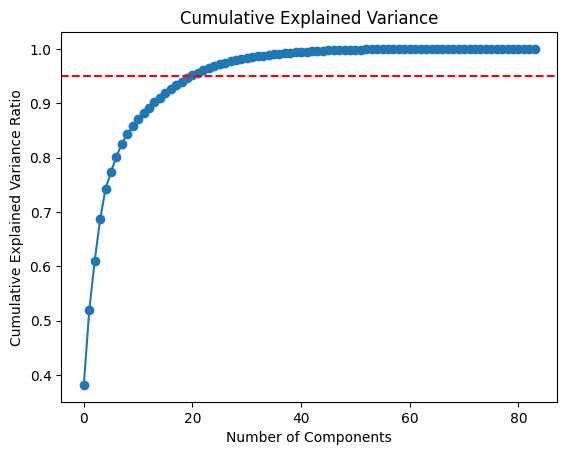

First component to reach 95% explained variance: 21


In [40]:
plt.plot(cum_var_rat, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()


target_variance_ratio = 0.95
first_component_index_95 = next(i for i, ratio in enumerate(cum_var_rat) if ratio >= target_variance_ratio)

print(f"First component to reach 95% explained variance: {first_component_index_95 + 1}")

In [41]:
pca = PCA(n_components=21)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

logreg_with_pca = logreg.score(X_test_pca, y_test)

In [42]:
print(f"Shape of X_train_pca : {X_train_pca.shape}, Shape of X_test_pca : {X_test_pca.shape}")

Shape of X_train_pca : (3041, 21), Shape of X_test_pca : (761, 21)


In [43]:
print(f"Logistic Regression Accuracy with PCA : {logreg_with_pca: .4f}")

Logistic Regression Accuracy with PCA :  0.5690


In [44]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),
                 max_iter=300,
                 random_state=42)
mlp.fit(X_train_pca, y_train)

y_pred=mlp.predict(X_test_pca)
mlp_with_pca =accuracy_score(y_test, y_pred)
print(f'MLP Accuracy with PCA : {mlp_with_pca:.4f}')

MLP Accuracy with PCA : 0.4796


### Lazy Predict
Lazy Predict is a Python library that serves the purpose of efficiently comparing machine learning models. It offers data scientists and analysts the ability to swiftly assess the performance of different algorithms, thereby gaining an initial understanding of the most suitable model or algorithm, without having to allocate excessive time and resources.

By automatically applying a range of machine learning algorithms for both classification and regression tasks, Lazy Predict provides essential performance metrics for each algorithm, including accuracy, F1 score, ROC AUC score, and more. This eliminates the need for manual coding of multiple models and allows users to promptly evaluate how various models perform on their datasets.

Lazy Predict proves particularly valuable when conducting quick initial analyses on large datasets or when determining which models warrant a more comprehensive examination. By saving time in the early stages of data science projects and facilitating an effective comparison of different models, Lazy Predict streamlines the process and enhances the efficiency of model evaluation.

In [45]:
lazy = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [46]:
models,predictions = lazy.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:44<00:00,  1.54s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.51,0.36,None,0.49,0.10
BernoulliNB,0.48,0.36,None,0.45,0.11
LinearDiscriminantAnalysis,0.55,0.30,None,0.49,0.21
GaussianNB,0.07,0.26,None,0.11,0.05
LGBMClassifier,0.43,0.24,None,0.41,7.19
RandomForestClassifier,0.40,0.23,None,0.39,1.68
DecisionTreeClassifier,0.40,0.23,None,0.40,0.20
KNeighborsClassifier,0.48,0.23,None,0.44,0.11
ExtraTreeClassifier,0.39,0.23,None,0.39,0.04


In [47]:
ada=AdaBoostClassifier(n_estimators=50, random_state=42)
rdg=RidgeClassifier()
lrg=LogisticRegression(max_iter=1000, solver='newton-cg')
svc=SVC(kernel='linear')
dummy=DummyClassifier()

In [48]:
clf=VotingClassifier(estimators=[('ada',ada),
                                ('rdg', rdg),
                                ('lrg',lrg),
                                ('svc',svc),
                                ('dummy', dummy)], voting='hard')
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(random_state=42)),
                             ('rdg', RidgeClassifier()),
                             ('lrg',
                              LogisticRegression(max_iter=1000,
                                                 solver='newton-cg')),
                             ('svc', SVC(kernel='linear')),
                             ('dummy', DummyClassifier())])

In [49]:
voting_without_pca = clf.score(X_test,y_test)
print(f"Voting Classifier Accuracy with all features : {voting_without_pca :.4f}")

Voting Classifier Accuracy with all features : 0.5572


In [50]:
ada=AdaBoostClassifier(n_estimators=50, random_state=42)
rdg=RidgeClassifier()
lrg=LogisticRegression(max_iter=1000, solver='newton-cg')
svc=SVC(kernel='linear')
dummy=DummyClassifier()

clf_pca = VotingClassifier(estimators=[('ada',ada),
                                ('rdg', rdg),
                                ('lrg',lrg),
                                ('svc',svc),
                                ('dummy', dummy)], voting='hard')

clf_pca.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(random_state=42)),
                             ('rdg', RidgeClassifier()),
                             ('lrg',
                              LogisticRegression(max_iter=1000,
                                                 solver='newton-cg')),
                             ('svc', SVC(kernel='linear')),
                             ('dummy', DummyClassifier())])

In [51]:
voting_with_pca = clf_pca.score(X_test_pca ,y_test)
print(f"Voting Classifier Accuracy with PCA: {voting_with_pca :.4f}")

Voting Classifier Accuracy with PCA: 0.5677


In [52]:
df.shape

(3802, 85)

---

#### I am dropping the features from the dataset that have a correlation with 'Number of Bugs' less than 0.1

In [53]:
df.drop(low_corr, axis = 1, inplace = True)

In [54]:
df.shape

(3802, 55)

In [55]:
X = df.drop("Number of Bugs", axis = 1)
y = df["Number of Bugs"]

In [56]:
print(f"Shape of X : {X.shape}, Shape of Y : {y.shape}")

Shape of X : (3802, 54), Shape of Y : (3802,)


In [57]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state= 42)

In [59]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),
                 max_iter=300,
                 random_state=42)

mlp.fit(X_train, y_train)

y_pred=mlp.predict(X_test)

mlp_high_corr_without_pca = accuracy_score(y_test, y_pred)

print(f'Accuracy obtained using high correlated features with MLP : {mlp_high_corr_without_pca:.4f}')

Accuracy obtained using high correlated features with MLP : 0.5204


In [60]:
logreg = LogisticRegression(max_iter = 500)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

logreg_high_corr_without_pca = accuracy_score(y_test, y_pred)

print(f'Accuracy obtained using high correlated features with Logistic Regression : {logreg_high_corr_without_pca : .4f}')

Accuracy obtained using high correlated features with Logistic Regression :  0.5572


In [61]:
ada=AdaBoostClassifier(n_estimators=50, random_state=42)
rdg=RidgeClassifier()
lrg=LogisticRegression(max_iter=1000, solver='newton-cg')
svc=SVC(kernel='linear')
dummy=DummyClassifier()

clf_high_corr = VotingClassifier(estimators=[('ada',ada),
                                ('rdg', rdg),
                                ('lrg',lrg),
                                ('svc',svc),
                                ('dummy', dummy)], voting='hard')

clf_high_corr.fit(X_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(random_state=42)),
                             ('rdg', RidgeClassifier()),
                             ('lrg',
                              LogisticRegression(max_iter=1000,
                                                 solver='newton-cg')),
                             ('svc', SVC(kernel='linear')),
                             ('dummy', DummyClassifier())])

In [62]:
voting_high_corr_without_pca = clf_high_corr.score(X_test, y_test)

print(f'Accuracy obtained using high correlated features with Voting Classifier : {voting_high_corr_without_pca:.4f}')

Accuracy obtained using high correlated features with Voting Classifier : 0.5637


In [63]:
pca=PCA()
X=pca.fit_transform(X)
ratio=pca.explained_variance_ratio_

In [64]:
# Cumulative variance
cum_var_rat=np.cumsum(ratio)
for i, ratio in enumerate(cum_var_rat,1):
    print(f'Compenent {i}: {ratio:.4f}')

Compenent 1: 0.5363
Compenent 2: 0.6265
Compenent 3: 0.7040
Compenent 4: 0.7658
Compenent 5: 0.8051
Compenent 6: 0.8351
Compenent 7: 0.8617
Compenent 8: 0.8823
Compenent 9: 0.8989
Compenent 10: 0.9127
Compenent 11: 0.9247
Compenent 12: 0.9354
Compenent 13: 0.9455
Compenent 14: 0.9545
Compenent 15: 0.9625
Compenent 16: 0.9692
Compenent 17: 0.9751
Compenent 18: 0.9807
Compenent 19: 0.9845
Compenent 20: 0.9868
Compenent 21: 0.9890
Compenent 22: 0.9909
Compenent 23: 0.9925
Compenent 24: 0.9937
Compenent 25: 0.9948
Compenent 26: 0.9957
Compenent 27: 0.9965
Compenent 28: 0.9971
Compenent 29: 0.9977
Compenent 30: 0.9981
Compenent 31: 0.9985
Compenent 32: 0.9988
Compenent 33: 0.9991
Compenent 34: 0.9993
Compenent 35: 0.9995
Compenent 36: 0.9996
Compenent 37: 0.9997
Compenent 38: 0.9998
Compenent 39: 0.9998
Compenent 40: 0.9999
Compenent 41: 0.9999
Compenent 42: 0.9999
Compenent 43: 1.0000
Compenent 44: 1.0000
Compenent 45: 1.0000
Compenent 46: 1.0000
Compenent 47: 1.0000
Compenent 48: 1.0000
C

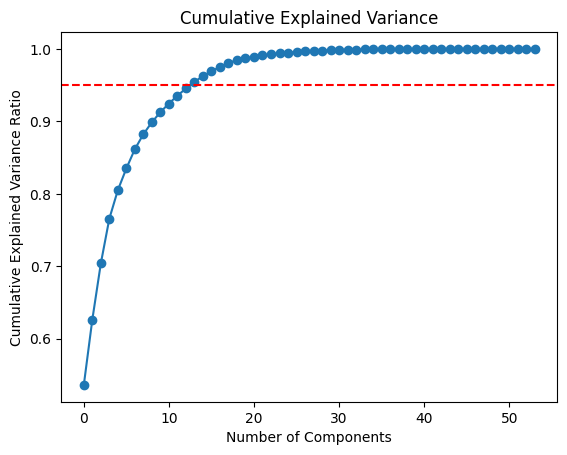

First component to reach 95% explained variance: 14


In [65]:
plt.plot(cum_var_rat, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()


target_variance_ratio = 0.95
first_component_index_95 = next(i for i, ratio in enumerate(cum_var_rat) if ratio >= target_variance_ratio)

print(f"First component to reach 95% explained variance: {first_component_index_95 + 1}")

In [66]:
pca = PCA(n_components=14)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

logreg_high_corr_with_pca = logreg.score(X_test_pca, y_test)

print(f'Accuracy obtained using high correlated features with Logistic Regression + PCA : {logreg_high_corr_with_pca:.4f}')

Accuracy obtained using high correlated features with Logistic Regression + PCA : 0.5611


In [67]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),
                 max_iter=300,
                 random_state=42)

mlp.fit(X_train_pca, y_train)

y_pred=mlp.predict(X_test_pca)

mlp_high_corr_with_pca = accuracy_score(y_test, y_pred)

print(f'Accuracy obtained using high correlated features with MLP + PCA : {mlp_high_corr_with_pca:.4f}')

Accuracy obtained using high correlated features with MLP + PCA : 0.5335


In [68]:
ada=AdaBoostClassifier(n_estimators=50, random_state=42)
rdg=RidgeClassifier()
lrg=LogisticRegression(max_iter=1000, solver='newton-cg')
svc=SVC(kernel='linear')
dummy=DummyClassifier()

clf_high_corr = VotingClassifier(estimators=[('ada',ada),
                                ('rdg', rdg),
                                ('lrg',lrg),
                                ('svc',svc),
                                ('dummy', dummy)], voting='hard')

clf_high_corr.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(random_state=42)),
                             ('rdg', RidgeClassifier()),
                             ('lrg',
                              LogisticRegression(max_iter=1000,
                                                 solver='newton-cg')),
                             ('svc', SVC(kernel='linear')),
                             ('dummy', DummyClassifier())])

In [69]:
voting_high_corr_with_pca = clf_high_corr.score(X_test_pca, y_test)

print(f'Accuracy obtained using high correlated features with Voting Classifier + PCA : {voting_high_corr_with_pca:.4f}')

Accuracy obtained using high correlated features with Voting Classifier + PCA : 0.5716


---